#**INTERNSHIP PROJECT**
#**Title : Linear Regression**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
# check for missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [3]:
def perform_one_hot_encoding(df,column_name):
  dummies = pd.get_dummies(df [column_name], prefix=column_name)

  df= pd.concat([df.drop(column_name,axis=1),dummies],axis=1)

  return df

In [4]:
data=perform_one_hot_encoding(data,"sex")
data=perform_one_hot_encoding(data,"region")
data=perform_one_hot_encoding(data,"smoker")

In [5]:
data.head()

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,1,0,0,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,0,1,0,1,0
3,33,22.705,0,21984.47061,0,1,0,1,0,0,1,0
4,32,28.880,0,3866.85520,0,1,0,1,0,0,1,0


In [6]:
#split the data into feature(x) and target variable(y)
x=data.drop("charges",axis=1)
y=data["charges"]


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 33596915.851361476
R-squared: 0.7835929767120722


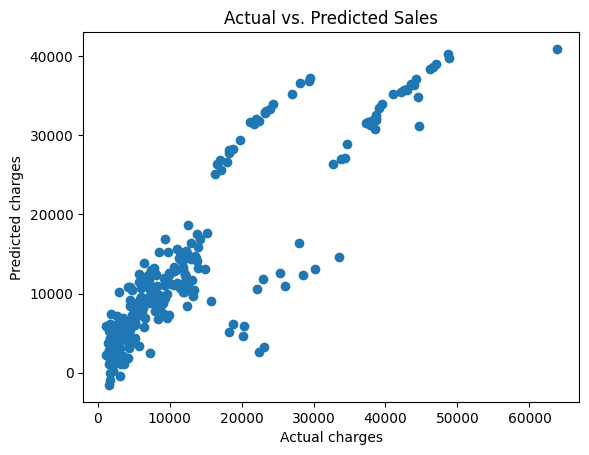

In [10]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Actual vs. Predicted Sales')
plt.show()